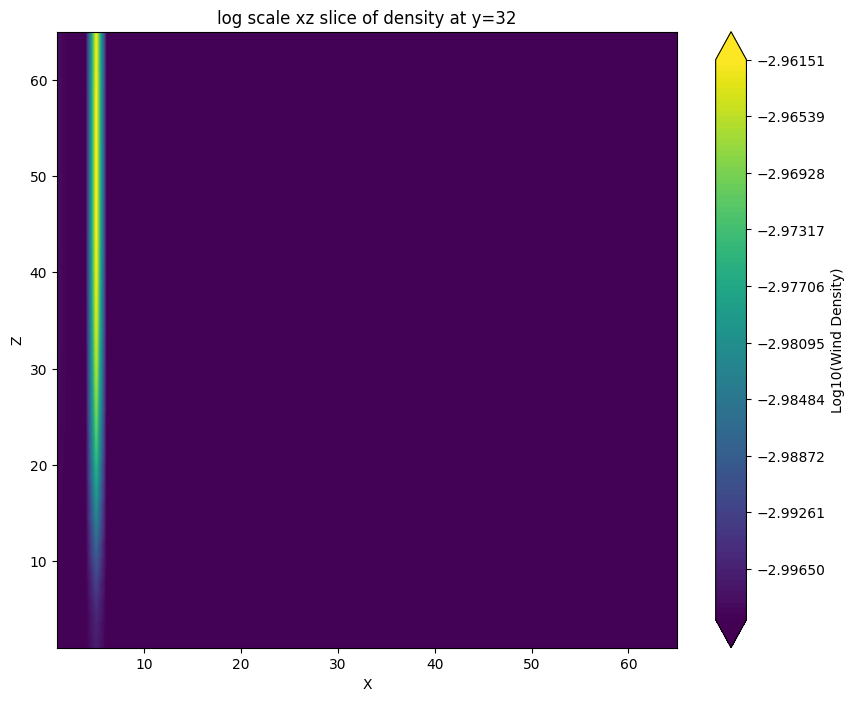

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')
rho = wind_density_data.reshape(64, 64, 64)

def grid(x, xmin, xmax, y, ymin, ymax, z, resX=5000, resY=5000):
    xi = np.linspace(xmin, xmax, resX)
    yi = np.linspace(ymin, ymax, resY)
    Z = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

y_index = 20
xz_slice = rho[:, y_index, :]

x = np.linspace(1, 65, 64)
z = np.linspace(1, 65, 64)
X, Z = np.meshgrid(x, z)
# grid data
x_flat = X.flatten()
z_flat = Z.flatten()
rho_flat = xz_slice.flatten()

rho_log = np.log10(rho_flat + 1e-3)
# prepare for interpolation by spatial biundries
xmin, xmax = 1, 65
zmin, zmax = 1, 65

X_grid, Z_grid, Rho_interpolated = grid(x_flat, xmin, xmax, z_flat, zmin, zmax, rho_log)

plt.figure(figsize=(10, 8))
levels = np.linspace(np.nanmin(Rho_interpolated), np.nanmax(Rho_interpolated), 100)
contourf = plt.contourf(X_grid, Z_grid, Rho_interpolated, levels=levels, extend='both')
plt.colorbar(contourf, label='Log10(Wind Density)')
plt.title('log scale xz slice of density at y=32')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()
